# Name : Snehal Shyam Jagtap

## Assignment No 17



### SUPPORT VECTOR MACHINE

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the mushroom dataset
df = pd.read_csv('mushroom.csv')

### Task 1: Exploratory Data Analysis (EDA)

In [3]:
print("First five rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First five rows of the dataset:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore

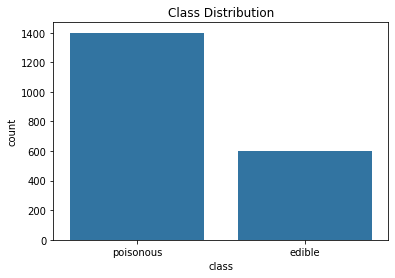

In [4]:
# Visualize class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

### Task 2: Data Preprocessing

In [5]:
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [6]:
# Split the dataset into training and testing sets
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Task 3: Data Visualization

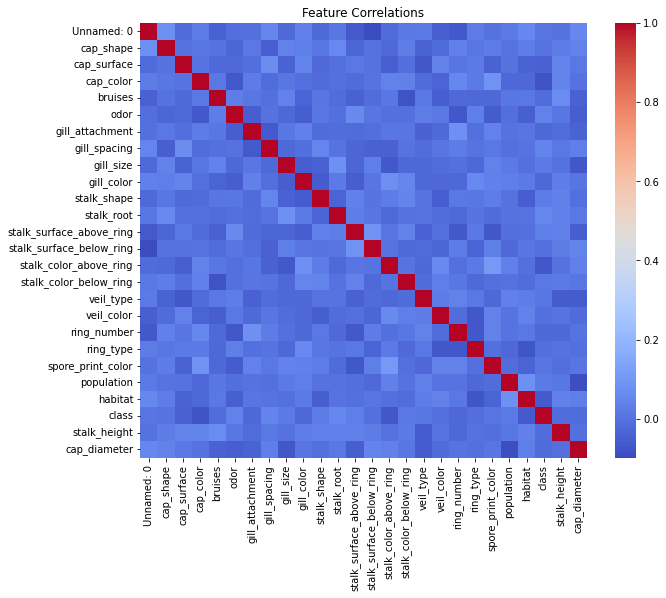

In [7]:
# Visualize correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

### Task 4: SVM Implementation

In [8]:
# Implementing SVM classifier
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

### Task 5: Evaluation of the model

In [9]:
y_pred = svm_model.predict(X_test)

In [10]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  0 185]
 [  0 415]]


In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 69.17%


### Task 6: Parameter Tuning and Optimization

In [13]:
# Let's try with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [14]:
print("\nLinear Kernel SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear) * 100:.2f}%")


Linear Kernel SVM:
Accuracy: 69.17%


In [15]:
### Task 7: Comparison and Analysis

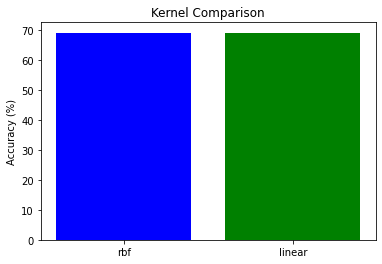

In [16]:
# Visualize the comparison of the two kernels
kernels = ['rbf', 'linear']
accuracies = [accuracy_score(y_test, y_pred) * 100, accuracy_score(y_test, y_pred_linear) * 100]

plt.bar(kernels, accuracies, color=['blue', 'green'])
plt.title('Kernel Comparison')
plt.ylabel('Accuracy (%)')
plt.show()